# **Plotting Residuals for Finer Mesh (without Wall Functions)**

This notebook explains how to plot residuals as time increases for finer mesh (double number of cells along with x-direction) for two turbulent models ('*kOmegaSST*' and '*SpalartAllmaras*'). First of all, related setups are to be established as follows.

In [1]:
#!/usr/bin/env python
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# increase dpi and use latex rendering
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 160
mpl.rc('text', usetex=True)

# Set macro for paths
run = "../run/"
finerMesh = "./output/finerMesh/"
!mkdir -p output
!mkdir -p output/finerMesh

## **1. Set Related Variables in Accordance with the Case Data**

In [2]:
model = "kOmegaSST"
model_sa = "SpalartAllmaras"
yp = ['0.05']
res_list = ['1e-5']

## **2. Load Data**

### 2-1. '*kOmegaSST*'

In [3]:
solverInfo_path = [run + 'turbulentFlatPlate_noWallFunc_finerMesh_kOmegaSST/yplus_{}/solverInfo_{}_{}_{}.csv'.format(yp[j], model, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
solverInfo_data = [pd.read_csv(solverInfo_path[i + len(res_list)*j], delim_whitespace=True, skiprows = 1) for j in range(len(yp)) for i in range(len(res_list))]
solverInfo_data[0].head()

,Time,U_solver,Ux_initial,Ux_final,Ux_iters,Uy_initial,Uy_final,Uy_iters,U_converged,p_solver,p_initial,p_final,p_iters,p_converged
0,1,smoothSolver,1.000000,0.053784,2,1.000000,0.081533,1,False,GAMG,1.000000,0.068419,18,True
1,2,smoothSolver,0.093866,0.005801,4,0.155539,0.010643,1,False,GAMG,0.001345,0.000083,6,True
2,3,smoothSolver,0.037740,0.002551,5,0.083774,0.007151,1,False,GAMG,0.002167,0.000144,6,True
3,4,smoothSolver,0.023026,0.001980,5,0.051370,0.005125,1,False,GAMG,0.002921,0.000269,3,True
4,5,smoothSolver,0.016795,0.001622,5,0.040616,0.004058,1,False,GAMG,0.003241,0.000303,4,True


### 2-2. '*SpalartAllmaras*'

In [4]:
solverInfo_path_sa = [run + 'turbulentFlatPlate_noWallFunc_finerMesh_SA/yplus_{}/solverInfo_{}_{}_{}.csv'.format(yp[j], model_sa, yp[j], res_list[i]) for j in range(len(yp)) for i in range(len(res_list))]
solverInfo_data_sa = [pd.read_csv(solverInfo_path_sa[i + len(res_list)*j], delim_whitespace=True, skiprows = 1) for j in range(len(yp)) for i in range(len(res_list))]
solverInfo_data_sa[0].head()

,Time,U_solver,Ux_initial,Ux_final,Ux_iters,Uy_initial,Uy_final,Uy_iters,U_converged,p_solver,p_initial,p_final,p_iters,p_converged
0,1,smoothSolver,1.000000,0.068462,3,1.000000,0.069017,2,False,GAMG,1.000000,0.094604,15,True
1,2,smoothSolver,0.156614,0.012271,3,0.150432,0.008457,2,False,GAMG,0.001424,0.000133,5,True
2,3,smoothSolver,0.049706,0.004813,4,0.081365,0.005517,2,False,GAMG,0.002416,0.000133,6,True
3,4,smoothSolver,0.028184,0.002316,5,0.049638,0.003746,2,False,GAMG,0.002988,0.000216,3,True
4,5,smoothSolver,0.019933,0.001876,5,0.038744,0.002710,2,False,GAMG,0.003140,0.000242,4,True


## **3. Import of Initial Residual for *'U<sub>x</sub>'*, *'U<sub>y</sub>'*, and *'p'***

### 3-1. '*kOmegaSST*'

In [5]:
Ux_init_res = [solverInfo_data[i + len(res_list)*j]['Ux_initial'] for j in range(len(yp)) for i in range(len(res_list))]
Uy_init_res = [solverInfo_data[i + len(res_list)*j]['Uy_initial'] for j in range(len(yp)) for i in range(len(res_list))]
p_init_res = [solverInfo_data[i + len(res_list)*j]['p_initial'] for j in range(len(yp)) for i in range(len(res_list))]
t = [solverInfo_data[i + len(res_list)*j]['Time'] for j in range(len(yp)) for i in range(len(res_list))]

### 3-2. '*SpalartAllmaras*'

In [6]:
Ux_init_res_sa = [solverInfo_data_sa[i + len(res_list)*j]['Ux_initial'] for j in range(len(yp)) for i in range(len(res_list))]
Uy_init_res_sa = [solverInfo_data_sa[i + len(res_list)*j]['Uy_initial'] for j in range(len(yp)) for i in range(len(res_list))]
p_init_res_sa = [solverInfo_data_sa[i + len(res_list)*j]['p_initial'] for j in range(len(yp)) for i in range(len(res_list))]
t_sa = [solverInfo_data_sa[i + len(res_list)*j]['Time'] for j in range(len(yp)) for i in range(len(res_list))]

## **4. Plot**

### 4-1. '*kOmegaSST*'

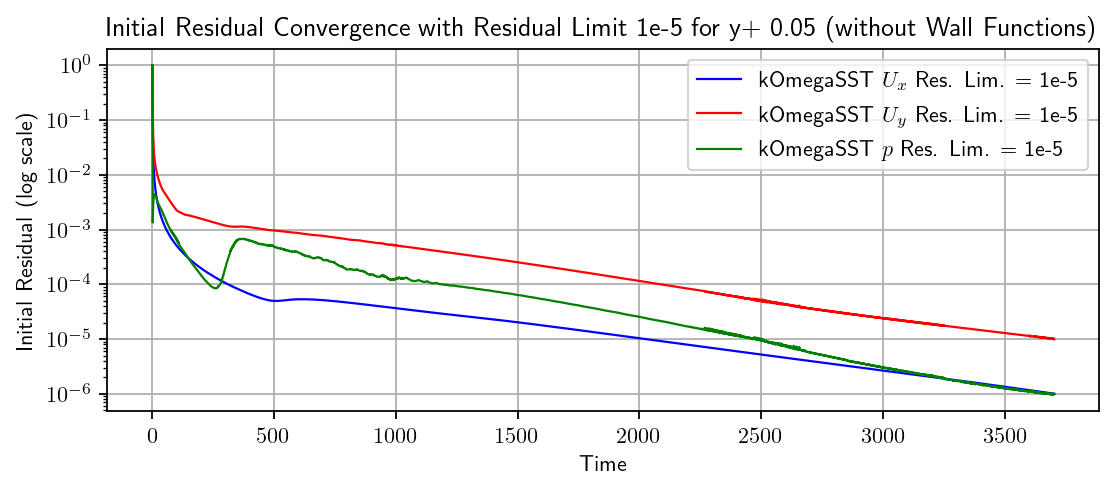

In [7]:
lw = 1.0
for j in range(len(yp)):
    for i in range(len(res_list)):
        fig, ax = plt.subplots(1, 1, figsize=(8, 3))
        plt.yscale("log")
        plt.grid()
        plt.title("Initial Residual Convergence with Residual Limit {} for y+ {} (without Wall Functions)".format(res_list[i], yp[j]))
        ax.set_xlabel("Time")
        ax.set_ylabel("Initial Residual (log scale)")
        ax.plot(t[i + len(res_list)*j], Ux_init_res[i + len(res_list)*j], color = 'b', label = "{} $U_x$ Res. Lim. = {}".format(model, res_list[i]), lw = lw)
        ax.plot(t[i + len(res_list)*j], Uy_init_res[i + len(res_list)*j], color = 'r', label = "{} $U_y$ Res. Lim. = {}".format(model, res_list[i]), lw = lw)
        ax.plot(t[i + len(res_list)*j], p_init_res[i + len(res_list)*j], color = 'g', label = "{} $p$ Res. Lim. = {}".format(model, res_list[i]), lw = lw)
        ax.legend()
        plt.savefig(finerMesh + "solverInfo_{}_yp{}_{}_withWallFunc.pdf".format(model, yp[j], res_list[i]), bbox_inches="tight")

### 4-2. '*SpalartAllmaras*'

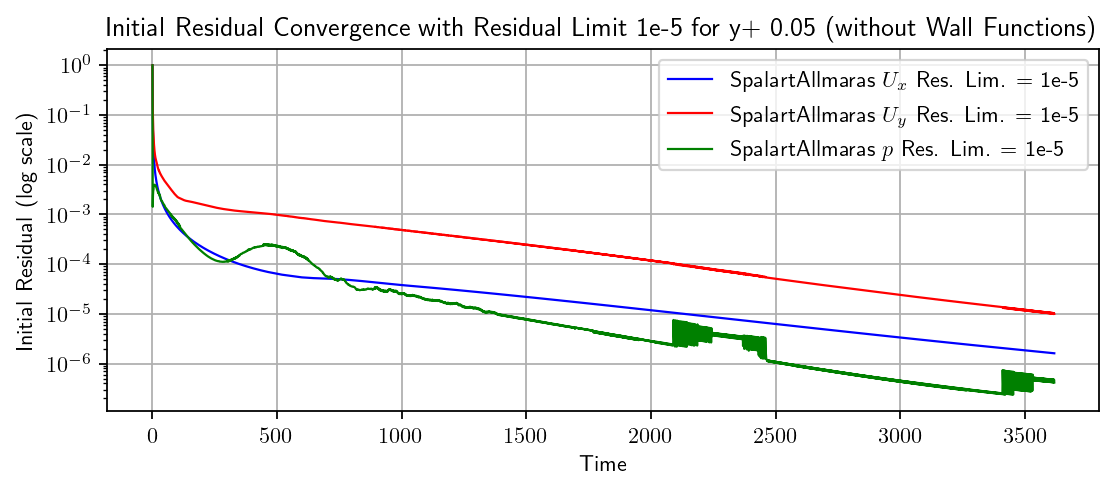

In [8]:
lw2 = 1.0
for j in range(len(yp)):
    for i in range(len(res_list)):
        fig2, ax2 = plt.subplots(1, 1, figsize=(8, 3))
        plt.yscale("log")
        plt.grid()
        plt.title("Initial Residual Convergence with Residual Limit {} for y+ {} (without Wall Functions)".format(res_list[i], yp[j]))
        ax2.set_xlabel("Time")
        ax2.set_ylabel("Initial Residual (log scale)")
        ax2.plot(t_sa[i + len(res_list)*j], Ux_init_res_sa[i + len(res_list)*j], color = 'b', label = "{} $U_x$ Res. Lim. = {}".format(model_sa, res_list[i]), lw = lw2)
        ax2.plot(t_sa[i + len(res_list)*j], Uy_init_res_sa[i + len(res_list)*j], color = 'r', label = "{} $U_y$ Res. Lim. = {}".format(model_sa, res_list[i]), lw = lw2)
        ax2.plot(t_sa[i + len(res_list)*j], p_init_res_sa[i + len(res_list)*j], color = 'g', label = "{} $p$ Res. Lim. = {}".format(model_sa, res_list[i]), lw = lw2)
        ax2.legend()
        plt.savefig(finerMesh + "solverInfo_{}_yp{}_{}_noWallFunc.pdf".format(model_sa, yp[j], res_list[i]), bbox_inches="tight")